<a href="https://colab.research.google.com/github/dfklsna/sangwoo-Kim/blob/main/DIABETES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

targetUrl = "https://raw.githubusercontent.com/dfklsna/sangwoo-Kim/main/diabetes_prediction_dataset.csv"
df = pd.read_csv(targetUrl, sep=';')

new_columns = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']
df[new_columns] = df['gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes'].str.split(',', expand=True)

In [ ]:
df = df.drop(columns=df.columns[0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   gender               100000 non-null  object
 1   age                  100000 non-null  object
 2   hypertension         100000 non-null  object
 3   heart_disease        100000 non-null  object
 4   smoking_history      100000 non-null  object
 5   bmi                  100000 non-null  object
 6   HbA1c_level          100000 non-null  object
 7   blood_glucose_level  100000 non-null  object
 8   diabetes             100000 non-null  object
dtypes: object(9)
memory usage: 6.9+ MB


In [ ]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
df = df.drop_duplicates()
import random

random_seed = 42 
random.seed(random_seed)

In [ ]:
df.diabetes.value_counts(normalize = True).mul(100)

0    91.178
1     8.822
Name: diabetes, dtype: float64

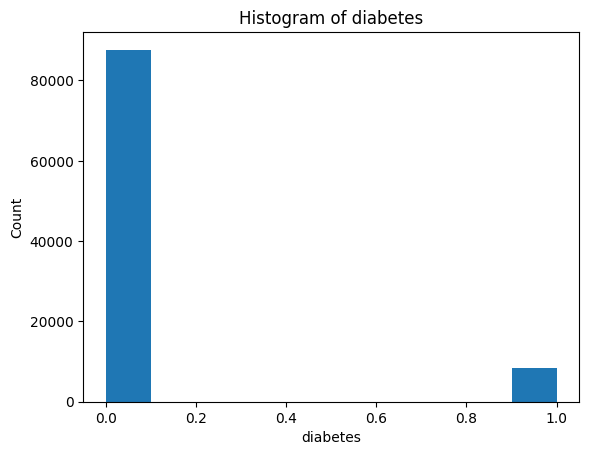

In [ ]:
import seaborn as sns
plt.hist(df['diabetes'])
plt.xlabel('diabetes')
plt.ylabel('Count')
plt.title('Histogram of diabetes')
plt.show()

In [ ]:
pd.crosstab(df.gender, df.hypertension, margins = True)

hypertension,0,1,All
gender,,,
Female,51982,4179,56161
Male,36685,3282,39967
Other,18,0,18
All,88685,7461,96146


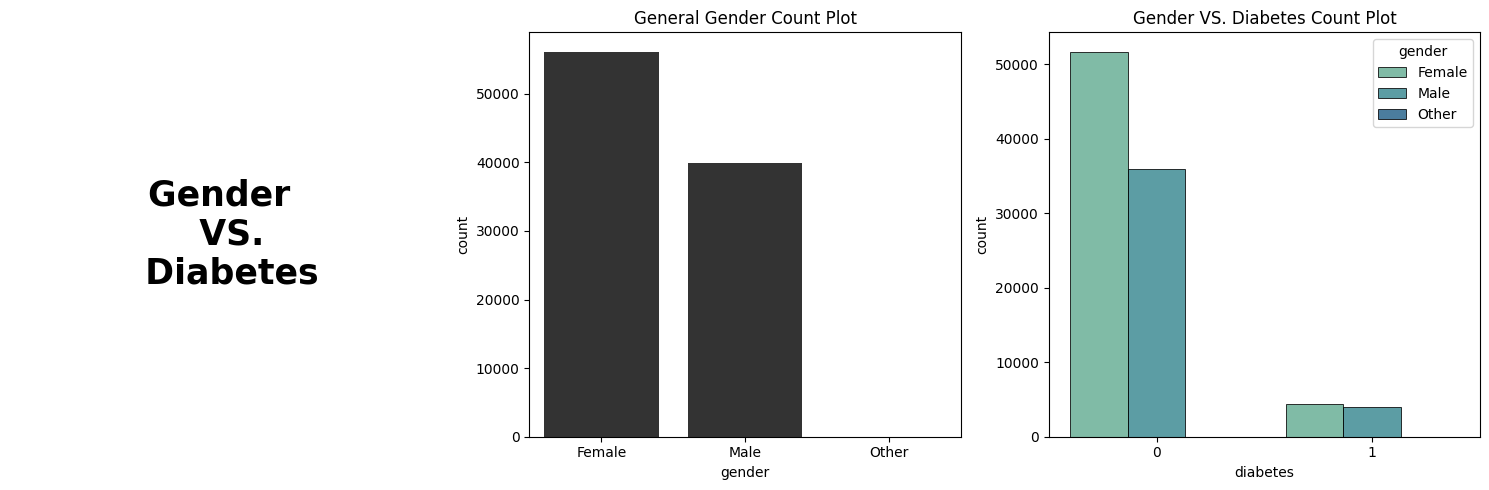

In [ ]:
fig = plt.figure(figsize = (15,5))

ax = plt.subplot(1,3,1)
ax.text(0.5, 0.5, "Gender \n  VS. \n Diabetes", fontdict={'fontsize': 25, 'fontweight': 'bold', 'color': 'black', 'ha': 'center', 'va': 'center'})
ax.axis('off')


plt.subplot(1,3, 2)

sns.countplot(x = df['gender'], color = "black",  alpha = 0.8, saturation =1)

plt.title("General Gender Count Plot")


plt.subplot(1,3, 3)
sns.countplot( x = df['diabetes'], hue = df['gender'],   palette='crest', linewidth = 0.7, alpha = 0.8, edgecolor = 'k', saturation =1)
plt.title("Gender VS. Diabetes Count Plot")

plt.tight_layout()
plt.show()

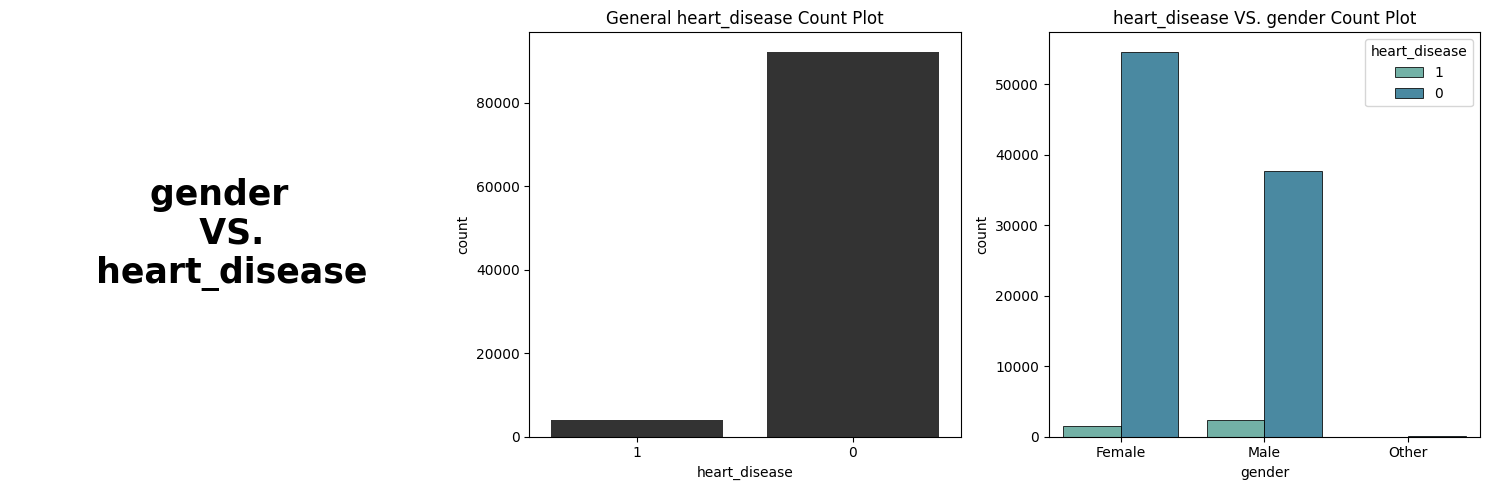

In [ ]:
fig = plt.figure(figsize = (15,5))

ax = plt.subplot(1,3,1)
ax.text(0.5, 0.5, "gender \n  VS. \n heart_disease", fontdict={'fontsize': 25, 'fontweight': 'bold', 'color': 'black', 'ha': 'center', 'va': 'center'})
ax.axis('off')


plt.subplot(1,3, 2)

sns.countplot(x = df['heart_disease'], color = "black",  alpha = 0.8, saturation =1)

plt.title("General heart_disease Count Plot")


plt.subplot(1,3, 3)
sns.countplot( x = df['gender'], hue = df['heart_disease'],   palette='crest', linewidth = 0.7, alpha = 0.8, edgecolor = 'k', saturation =1)
plt.title("heart_disease VS. gender Count Plot")

plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(df.smoking_history, df.diabetes, margins = True)

diabetes,0,1,All
smoking_history,,,
No Info,31442,1445,32887
current,8249,948,9197
ever,3526,472,3998
former,7709,1590,9299
never,31061,3337,34398
not current,5677,690,6367
All,87664,8482,96146


In [ ]:
pd.crosstab(df.gender, df.smoking_history, margins = True)

smoking_history,No Info,current,ever,former,never,not current,All
gender,,,,,,,
Female,17969,5011,2236,4743,22339,3863,56161
Male,14912,4186,1761,4556,12056,2496,39967
Other,6,0,1,0,3,8,18
All,32887,9197,3998,9299,34398,6367,96146


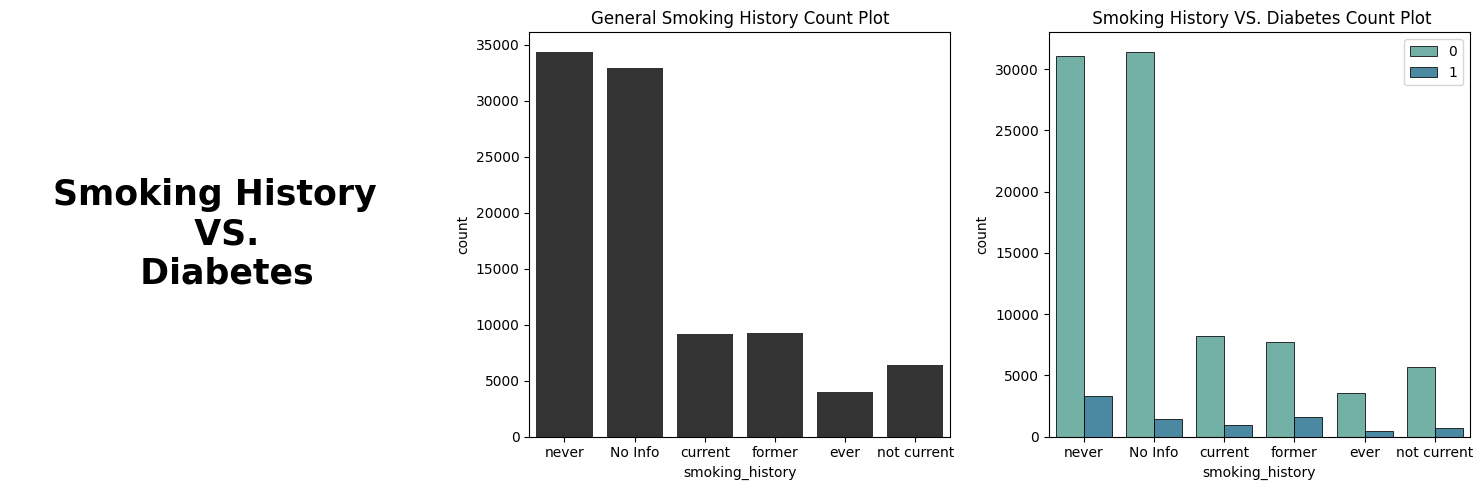

In [ ]:
fig = plt.figure(figsize = (15,5))

ax = plt.subplot(1,3,1)
ax.text(0.5, 0.5, "Smoking History \n  VS. \n Diabetes", fontdict={'fontsize': 25, 'fontweight': 'bold', 'color': 'black', 'ha': 'center', 'va': 'center'})
ax.set_facecolor("#97C8A7")
ax.axis('off')



plt.subplot(1,3, 2)
counts = df['smoking_history'].value_counts().reset_index().sort_values(by = 'smoking_history', ascending = False)
sns.countplot(x = 'smoking_history', data = df, color = "black", alpha = 0.8, saturation =1)
plt.title("General Smoking History Count Plot")


plt.subplot(1,3, 3)
sns.countplot( x =df['smoking_history'] , hue = df['diabetes'] ,   palette='crest', linewidth = 0.7, edgecolor = 'k', saturation =1, alpha = 0.8)
plt.title(" Smoking History VS. Diabetes Count Plot")



plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
df.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146,96146,96146,96146,96146,96146,96146,96146,96146
unique,3,102,2,2,6,4247,18,18,2
top,Female,80.0,0,0,never,27.32,6.6,159,0
freq,56161,4932,88685,92223,34398,21666,8164,7478,87664


In [ ]:
cat_cols = [x for x in df.dtypes.index if df.dtypes[x] == 'object']
con_cols = [x for x in df.dtypes.index if df.dtypes[x] != 'object']
for col in cat_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())


gender:
Female    56161
Male      39967
Other        18
Name: gender, dtype: int64

age:
80.0    4932
51.0    1566
47.0    1511
48.0    1508
53.0    1498
        ... 
0.48      83
1.0       83
0.4       66
0.16      59
0.08      36
Name: age, Length: 102, dtype: int64

hypertension:
0    88685
1     7461
Name: hypertension, dtype: int64

heart_disease:
0    92223
1     3923
Name: heart_disease, dtype: int64

smoking_history:
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: smoking_history, dtype: int64

bmi:
27.32    21666
23.0       103
27.12      101
24.96      100
27.8       100
         ...  
58.23        1
48.18        1
55.57        1
57.07        1
60.52        1
Name: bmi, Length: 4247, dtype: int64

HbA1c_level:
6.6    8164
5.7    8124
6.5    8051
5.8    7992
6.0    7988
6.2    7958
6.1    7716
3.5    7319
4.8    7296
4.5    7290
4.0    7205
5.0    7155
8.8     660
8.2     659
9.0     652
7.5  

In [ ]:
zero_per = df['diabetes'].value_counts(normalize = True).mul(100)[0]
one_per = df['diabetes'].value_counts(normalize = True).mul(100)[1]

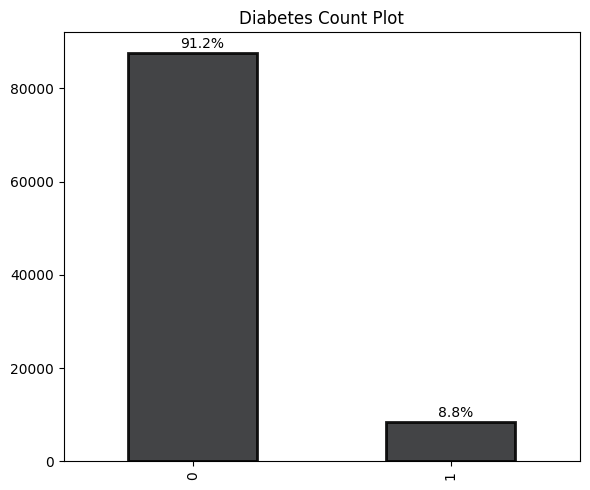

In [ ]:
fig = plt.figure(figsize = (6,5))

zero_per = df['diabetes'].value_counts(normalize = True).mul(100)[0] #getting percentage of 0 class
one_per = df['diabetes'].value_counts(normalize = True).mul(100)[1]  #getting percentage of 1 class

ax = df['diabetes'].value_counts().plot(kind = 'bar', color = '#2E2F32', edgecolor = 'k', linewidth = 2, alpha = 0.9)

ax.text(ax.patches[0].get_x() + 0.2 ,ax.patches[0].get_height() + 1000, f"{round(zero_per, 1)}%", fontsize = 10 ) #writing zero percentage to plot
ax.text(ax.patches[1].get_x() + 0.2 ,ax.patches[1].get_height() + 1000, f"{round(one_per, 1)}%", fontsize = 10 )  #writing one percentage to plot

plt.title("Diabetes Count Plot")


plt.tight_layout()
plt.show()

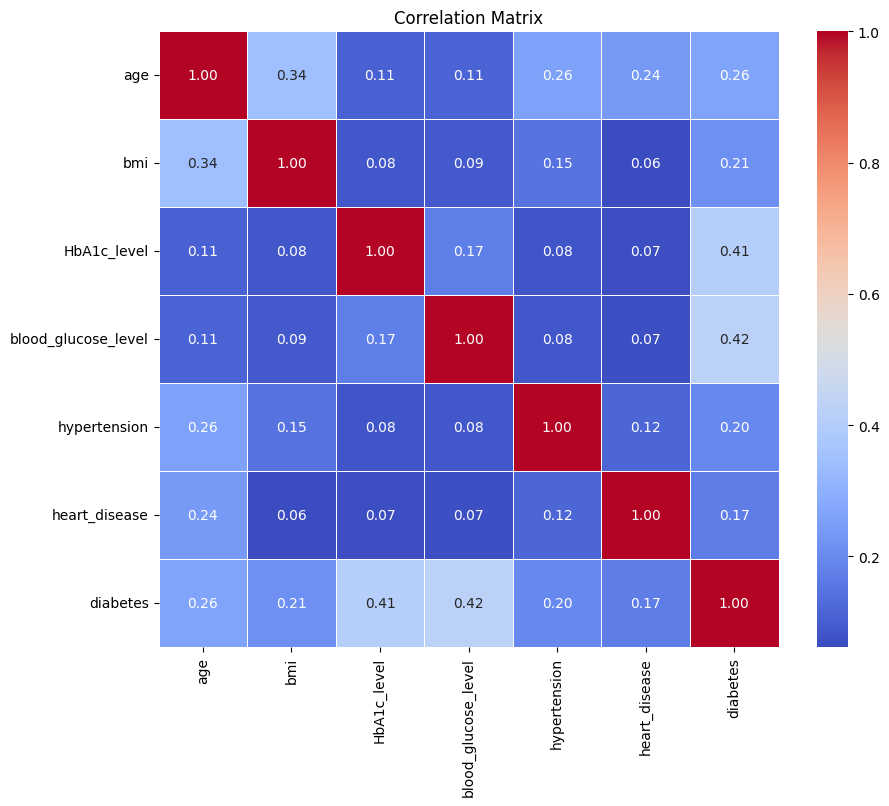

In [ ]:
numeric_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease', 'diabetes']
df_numeric = df[numeric_cols].astype(float)

correlation_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


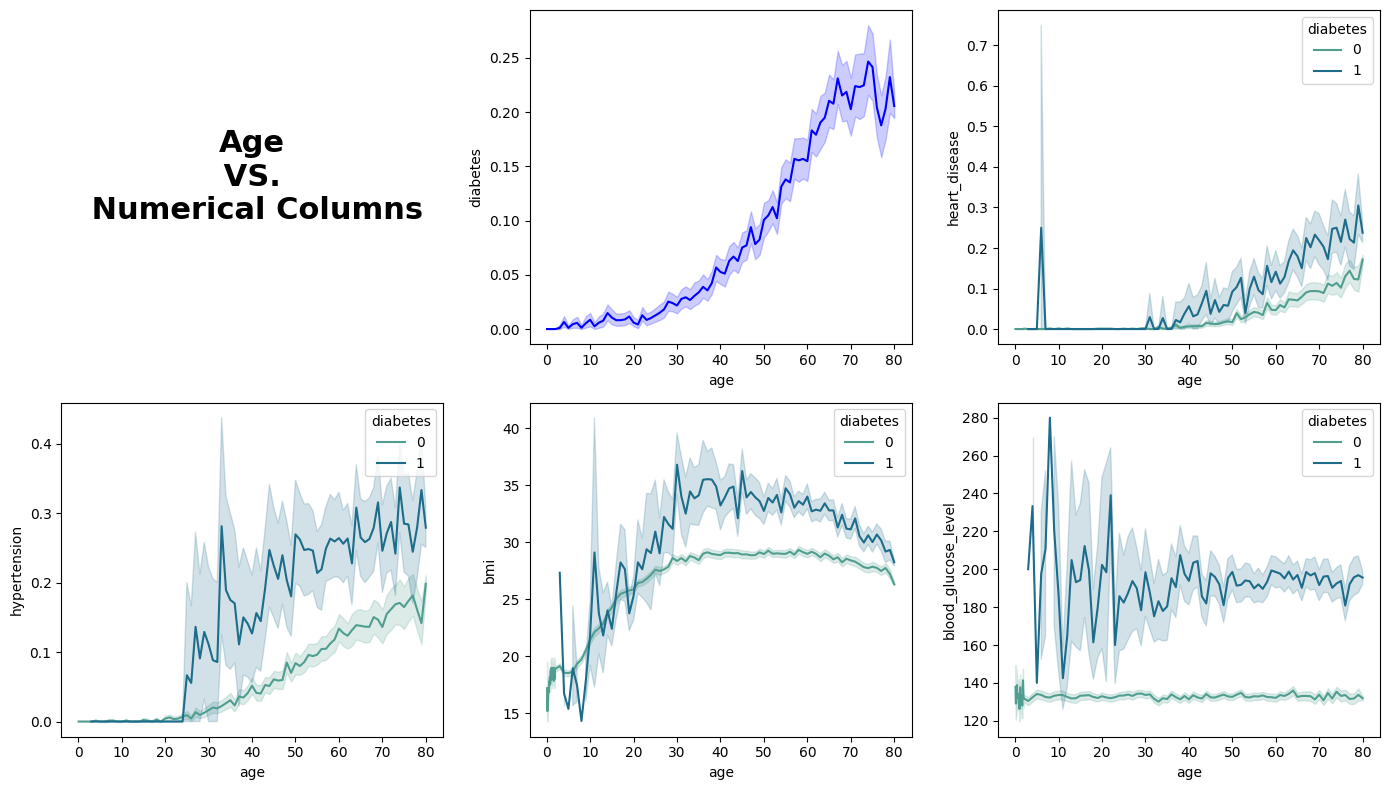

In [ ]:
numeric_cols = ['age', 'diabetes', 'heart_disease', 'hypertension', 'bmi', 'blood_glucose_level']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

fig = plt.figure(figsize=(14, 8))

ax = plt.subplot(2, 3, 1)
ax.text(0.5, 0.5, "Age\n VS. \n Numerical Columns", fontdict={'fontsize': 22, 'fontweight': 'bold', 'color': 'black', 'ha': 'center', 'va': 'center'})
ax.set_facecolor('white')
ax.axis('off')

plt.subplot(2, 3, 2)
sns.lineplot(x=df['age'], y=df['diabetes'], color="blue")  # Specify a color

plt.subplot(2, 3, 3)
sns.lineplot(x=df['age'], y=df['heart_disease'], hue=df['diabetes'], palette='crest')

plt.subplot(2, 3, 4)
sns.lineplot(x=df['age'], y=df['hypertension'], hue=df['diabetes'], palette='crest')

plt.subplot(2, 3, 5)
sns.lineplot(x=df['age'], y=df['bmi'], hue=df['diabetes'], palette='crest')

plt.subplot(2, 3, 6)
sns.lineplot(x=df['age'], y=df['blood_glucose_level'], hue=df['diabetes'], palette='crest')

plt.tight_layout()
plt.show()

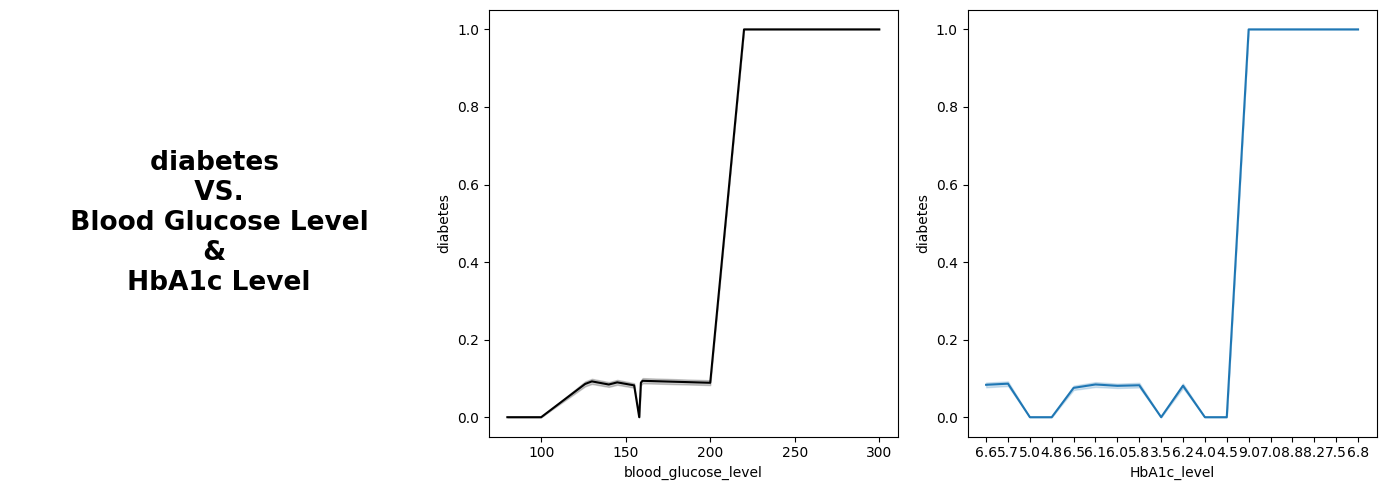

In [ ]:
fig = plt.figure(figsize = (14, 5))


ax = plt.subplot(1,3,1)
ax.text(0.5, 0.5, " diabetes \n  VS. \n  Blood Glucose Level \n & \n HbA1c Level", fontdict={'fontsize': 19, 'fontweight': 'bold', 'color': 'black', 'ha': 'center', 'va': 'center'})
ax.axis('off')

plt.subplot(1,3,2)
sns.lineplot(x = df['blood_glucose_level'], y =  df['diabetes'] , color = 'black' )


plt.subplot(1,3,3)
sns.lineplot(x = df['HbA1c_level'], y =  df['diabetes'] )

plt.tight_layout()

<Axes: >

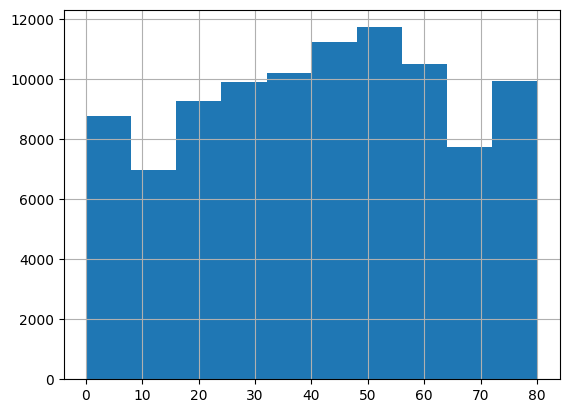

In [ ]:
df['age'].hist()

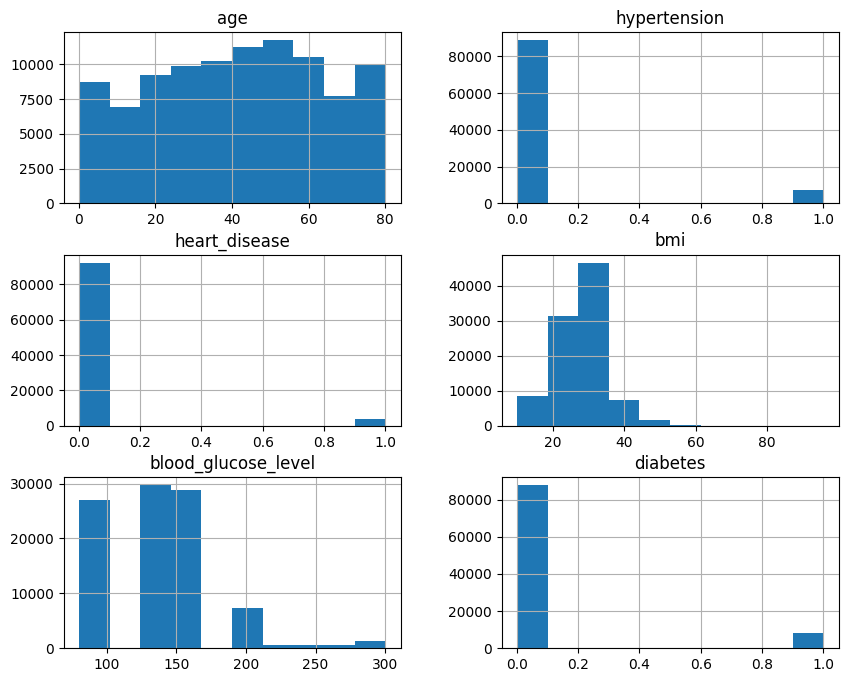

In [ ]:
df.hist(bins=10, figsize=(10,8))
plt.show()

In [ ]:
df['diabetes'].value_counts()

0    87664
1     8482
Name: diabetes, dtype: int64

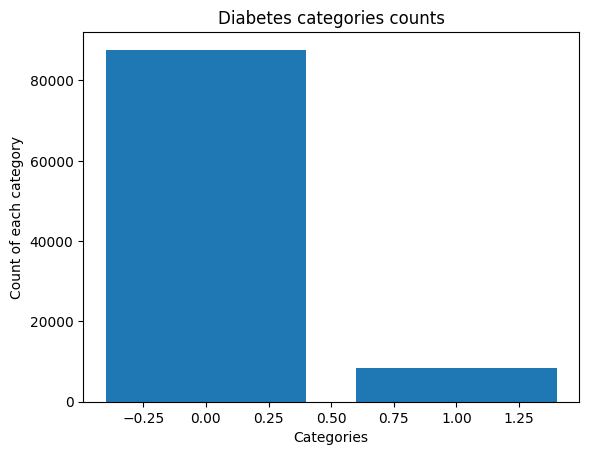

Count_of_0%: 91.17800012481018
Count_of_1%: 8.821999875189816


In [ ]:
value_counts = df['diabetes'].value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Categories')
plt.ylabel('Count of each category')
plt.title('Diabetes categories counts')
plt.show()
print('Count_of_0%: {}'.format(100 *(len(df[df['diabetes'] == 0])/len(df))))
print('Count_of_1%: {}'.format(100 *(len(df[df['diabetes'] == 1])/len(df))))

Epoch 1/10
2104/2104 [==============================] - 6s 2ms/step - loss: 0.1861 - accuracy: 0.9331 - val_loss: 0.1035 - val_accuracy: 0.9649
Epoch 2/10
2104/2104 [==============================] - 6s 3ms/step - loss: 0.1026 - accuracy: 0.9660 - val_loss: 0.0994 - val_accuracy: 0.9668
Epoch 3/10
2104/2104 [==============================] - 5s 2ms/step - loss: 0.1005 - accuracy: 0.9665 - val_loss: 0.0987 - val_accuracy: 0.9665
Epoch 4/10
2104/2104 [==============================] - 7s 3ms/step - loss: 0.0999 - accuracy: 0.9664 - val_loss: 0.0981 - val_accuracy: 0.9668
Epoch 5/10
2104/2104 [==============================] - 5s 2ms/step - loss: 0.0996 - accuracy: 0.9667 - val_loss: 0.0983 - val_accuracy: 0.9670
Epoch 6/10
2104/2104 [==============================] - 6s 3ms/step - loss: 0.0992 - accuracy: 0.9671 - val_loss: 0.0981 - val_accuracy: 0.9668
Epoch 7/10
2104/2104 [==============================] - 5s 2ms/step - loss: 0.0990 - accuracy: 0.9671 - val_loss: 0.0978 - val_accuracy:

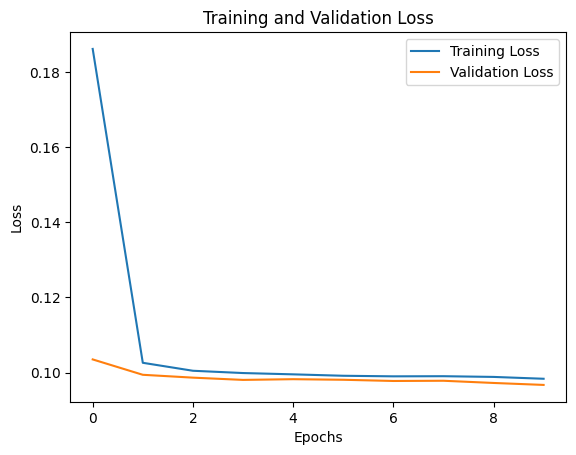

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.callbacks import EarlyStopping

X = df.drop('diabetes', axis=1)
y = df['diabetes']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

history = ann.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[early_stop])

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.callbacks import EarlyStopping

X = df.drop('diabetes', axis=1) 
y = df['diabetes']  

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X = pd.get_dummies(X)

scaler = StandardScaler()
X = scaler.fit_transform(X)


k = 5  
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

losses = []
accuracies = []


for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
    ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

    ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


    early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

    history = ann.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[early_stop])
    

    loss = ann.evaluate(X_test, y_test)[0]
    accuracy = ann.evaluate(X_test, y_test)[1]
    losses.append(loss)
    accuracies.append(accuracy)

print("Losses:", losses)
print("Accuracies:", accuracies)

Epoch 1/10
2404/2404 [==============================] - 7s 2ms/step - loss: 0.6667 - accuracy: 0.3740 - val_loss: 0.4149 - val_accuracy: 0.5397
Epoch 2/10
2404/2404 [==============================] - 5s 2ms/step - loss: 0.3836 - accuracy: 0.5183 - val_loss: 0.3556 - val_accuracy: 0.4897
Epoch 3/10
2404/2404 [==============================] - 5s 2ms/step - loss: 0.2895 - accuracy: 0.5024 - val_loss: 0.2483 - val_accuracy: 0.5777
Epoch 4/10
2404/2404 [==============================] - 5s 2ms/step - loss: 0.2201 - accuracy: 0.5633 - val_loss: 0.2157 - val_accuracy: 0.5115
Epoch 5/10
2404/2404 [==============================] - 6s 2ms/step - loss: 0.2113 - accuracy: 0.5390 - val_loss: 0.2084 - val_accuracy: 0.5568
Epoch 6/10
2404/2404 [==============================] - 5s 2ms/step - loss: 0.2080 - accuracy: 0.6145 - val_loss: 0.2066 - val_accuracy: 0.6900
Epoch 7/10
2404/2404 [==============================] - 6s 2ms/step - loss: 0.2068 - accuracy: 0.6720 - val_loss: 0.2069 - val_accuracy:

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np


scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


accuracies = []

# 배치 정규화
def build_batch_normalization_model():
    model = tf.keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        layers.BatchNormalization(),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# L2 정규화
def build_l2_regularization_model():
    model = tf.keras.Sequential([
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train.shape[1],)),
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# 배치 정규화 모델 훈련 및 평가
model = build_batch_normalization_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
accuracy = model.evaluate(X_test, y_test)[1]
accuracies.append(accuracy)

# L2 정규화 모델 훈련 및 평가
model = build_l2_regularization_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
accuracy = model.evaluate(X_test, y_test)[1]
accuracies.append(accuracy)

# 결과 출력
print("Accuracies:", accuracies)

Epoch 1/10
2404/2404 [==============================] - 9s 3ms/step - loss: 0.1359 - accuracy: 0.9556 - val_loss: 0.1011 - val_accuracy: 0.9659
Epoch 2/10
2404/2404 [==============================] - 7s 3ms/step - loss: 0.1009 - accuracy: 0.9669 - val_loss: 0.0930 - val_accuracy: 0.9687
Epoch 3/10
2404/2404 [==============================] - 7s 3ms/step - loss: 0.0939 - accuracy: 0.9686 - val_loss: 0.0886 - val_accuracy: 0.9698
Epoch 4/10
2404/2404 [==============================] - 7s 3ms/step - loss: 0.0898 - accuracy: 0.9694 - val_loss: 0.0874 - val_accuracy: 0.9700
Epoch 5/10
2404/2404 [==============================] - 7s 3ms/step - loss: 0.0889 - accuracy: 0.9696 - val_loss: 0.0889 - val_accuracy: 0.9702
Epoch 6/10
2404/2404 [==============================] - 6s 3ms/step - loss: 0.0881 - accuracy: 0.9700 - val_loss: 0.0866 - val_accuracy: 0.9707
Epoch 7/10
2404/2404 [==============================] - 7s 3ms/step - loss: 0.0872 - accuracy: 0.9701 - val_loss: 0.0868 - val_accuracy:

In [ ]:
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
print("Accuracies:", accuracies)

Epoch 1/10
2404/2404 [==============================] - 7s 2ms/step - loss: 0.1490 - accuracy: 0.9528 - val_loss: 0.0991 - val_accuracy: 0.9668
Epoch 2/10
2404/2404 [==============================] - 6s 2ms/step - loss: 0.1044 - accuracy: 0.9670 - val_loss: 0.0934 - val_accuracy: 0.9693
Epoch 3/10
2404/2404 [==============================] - 6s 2ms/step - loss: 0.0965 - accuracy: 0.9690 - val_loss: 0.0888 - val_accuracy: 0.9704
Epoch 4/10
2404/2404 [==============================] - 5s 2ms/step - loss: 0.0927 - accuracy: 0.9694 - val_loss: 0.0880 - val_accuracy: 0.9703
Epoch 5/10
2404/2404 [==============================] - 6s 2ms/step - loss: 0.0909 - accuracy: 0.9699 - val_loss: 0.0867 - val_accuracy: 0.9705
Epoch 6/10
2404/2404 [==============================] - 5s 2ms/step - loss: 0.0907 - accuracy: 0.9698 - val_loss: 0.0872 - val_accuracy: 0.9704
Epoch 7/10
2404/2404 [==============================] - 5s 2ms/step - loss: 0.0889 - accuracy: 0.9701 - val_loss: 0.0859 - val_accuracy:

Epoch 1/2
2404/2404 [==============================] - 7s 2ms/step - loss: 0.1102 - accuracy: 0.9635 - val_loss: 0.1010 - val_accuracy: 0.9655
Epoch 2/2
601/601 [==============================] - 1s 1ms/step
Confusion Matrix:
[[17439    70]
 [  550  1171]]


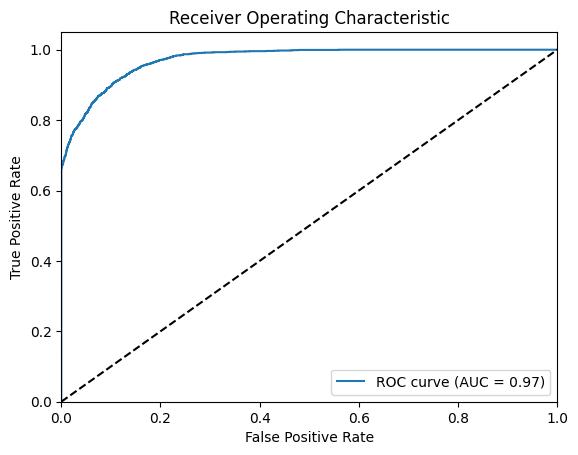

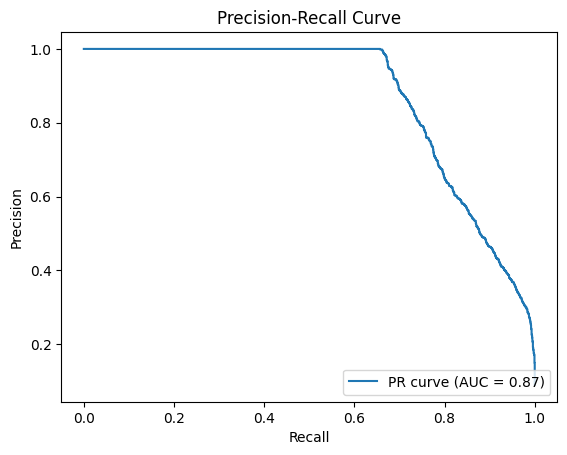

In [ ]:
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc


scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=2, batch_size=32, validation_data=(X_test, y_test))


y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
auc_score = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, label='PR curve (AUC = %0.2f)' % auc_score)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()